In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train a Random Forest classifier without feature selection
clf_without_fs = RandomForestClassifier(random_state=42)
clf_without_fs.fit(X_train, y_train)

# Evaluate the model without feature selection
y_pred_without_fs = clf_without_fs.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
print(f"Accuracy without feature selection: {accuracy_without_fs:.2f}")

# Perform feature selection (using Random Forest's feature_importances_)
feature_importances = clf_without_fs.feature_importances_
selected_features = [i for i, importance in enumerate(feature_importances) if importance > 0.1]

# Train a Random Forest classifier with feature selection
clf_with_fs = RandomForestClassifier(random_state=42)
clf_with_fs.fit(X_train[:, selected_features], y_train)

# Evaluate the model with feature selection
X_test_selected = X_test[:, selected_features]
y_pred_with_fs = clf_with_fs.predict(X_test_selected)
accuracy_with_fs = accuracy_score(y_test, y_pred_with_fs)
print(f"Selected Features: {selected_features}")
print(f"Accuracy with feature selection: {accuracy_with_fs:.2f}")


Accuracy without feature selection: 1.00
Selected Features: [0, 2, 3]
Accuracy with feature selection: 1.00


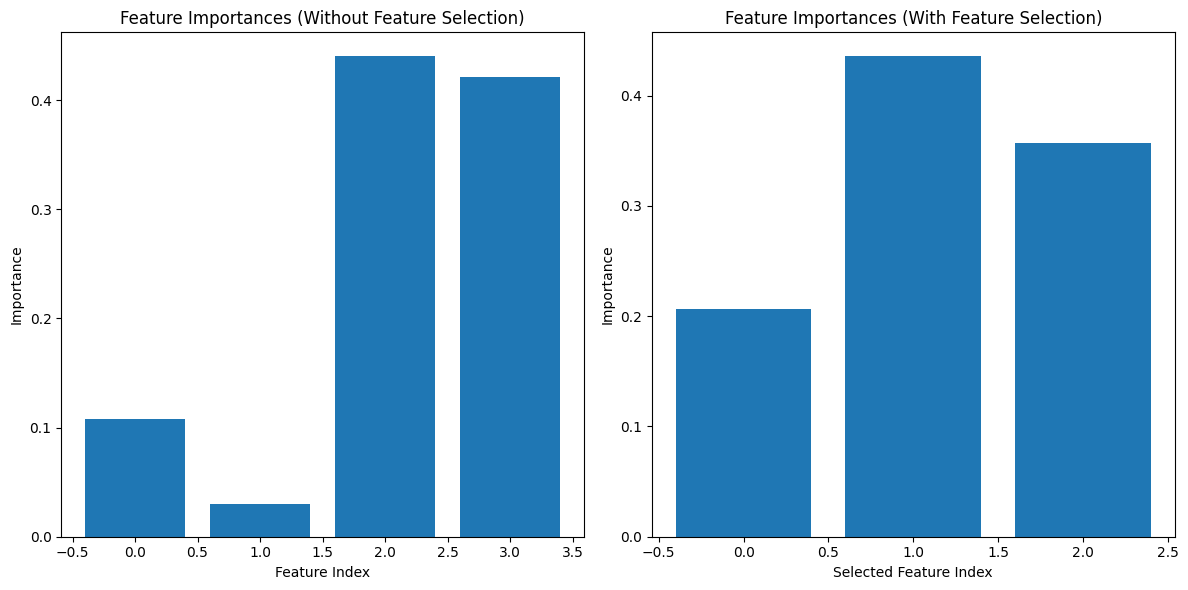

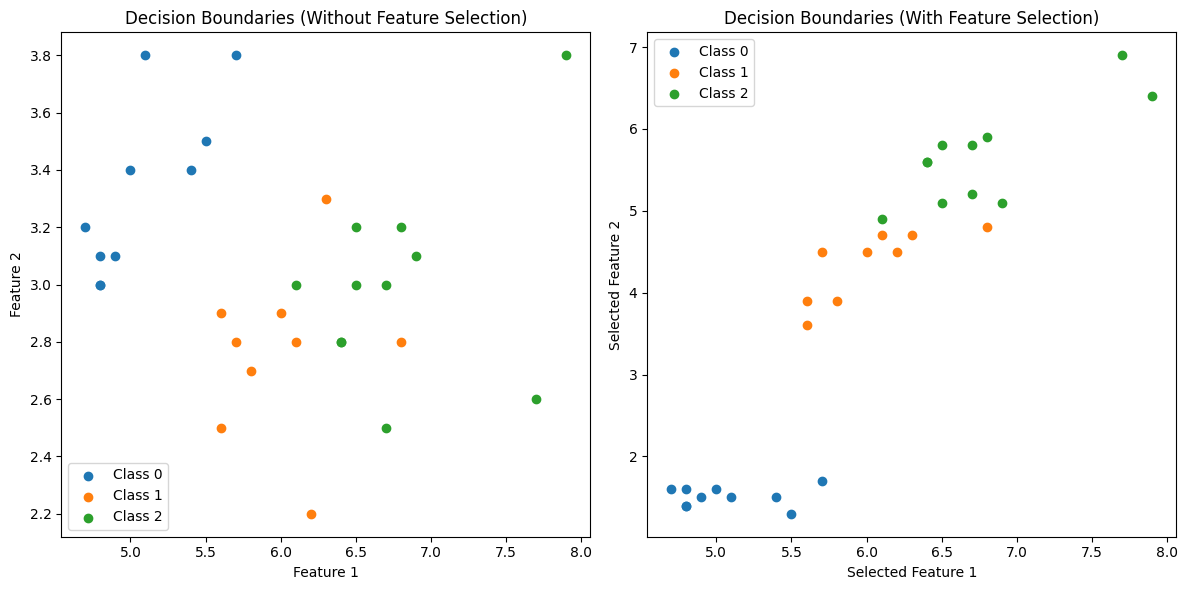

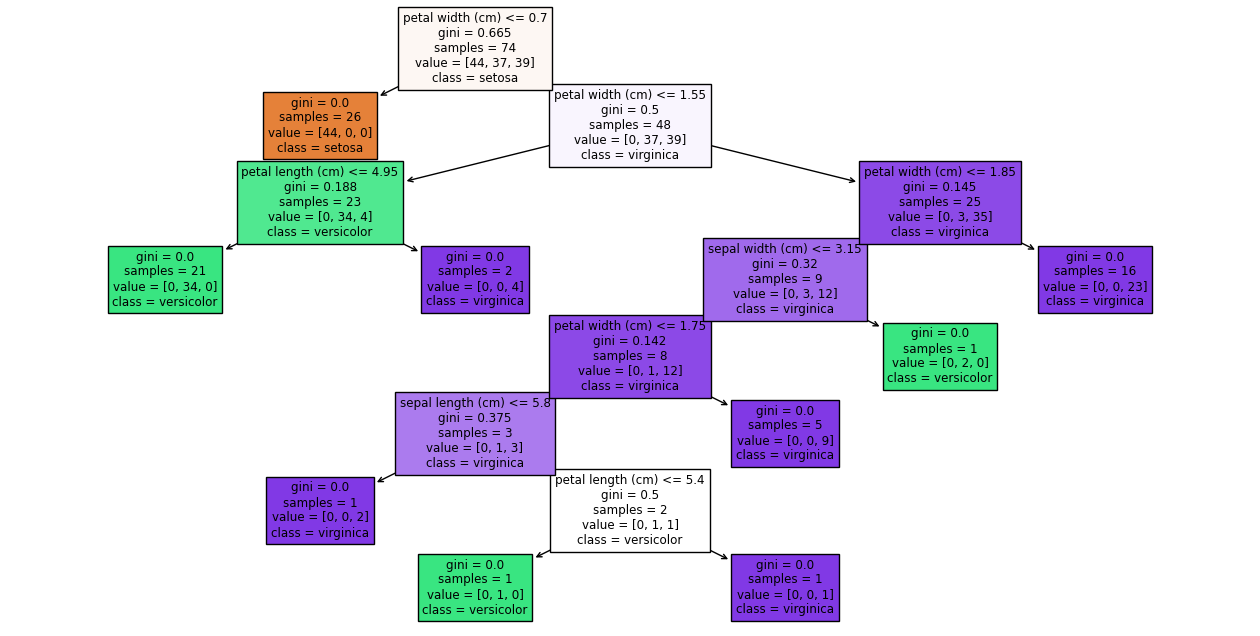

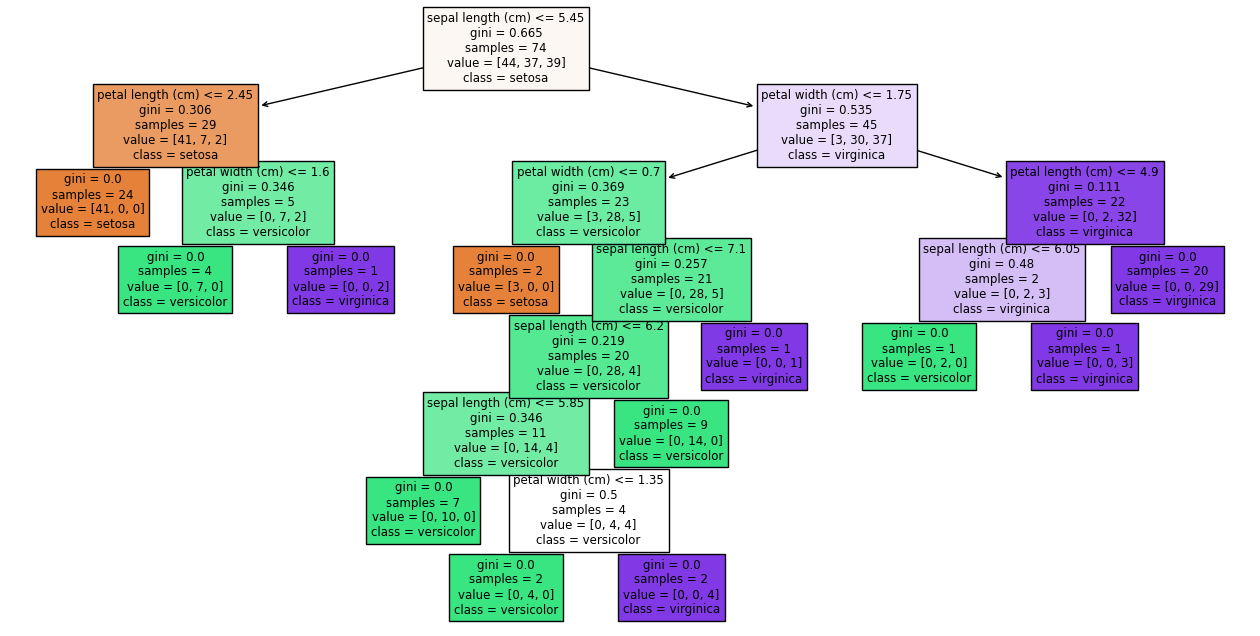

Accuracy without feature selection: 1.00
Accuracy with feature selection: 1.00


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier without feature selection
clf_without_fs = RandomForestClassifier(random_state=42)
clf_without_fs.fit(X_train, y_train)

# Evaluate the model without feature selection
y_pred_without_fs = clf_without_fs.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)

# Perform feature selection using Random Forest's feature importances
sfm = SelectFromModel(clf_without_fs, threshold=0.1)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a Random Forest classifier with feature selection
clf_with_fs = RandomForestClassifier(random_state=42)
clf_with_fs.fit(X_train_selected, y_train)

# Evaluate the model with feature selection
y_pred_with_fs = clf_with_fs.predict(X_test_selected)
accuracy_with_fs = accuracy_score(y_test, y_pred_with_fs)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(X_train.shape[1]), clf_without_fs.feature_importances_, align="center")
plt.title("Feature Importances (Without Feature Selection)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")

plt.subplot(1, 2, 2)
plt.bar(range(X_train_selected.shape[1]), clf_with_fs.feature_importances_, align="center")
plt.title("Feature Importances (With Feature Selection)")
plt.xlabel("Selected Feature Index")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()

# Plot decision boundaries for the models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class {i}')
plt.title("Decision Boundaries (Without Feature Selection)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_test_selected[y_test == i, 0], X_test_selected[y_test == i, 1], label=f'Class {i}')
plt.title("Decision Boundaries (With Feature Selection)")
plt.xlabel("Selected Feature 1")
plt.ylabel("Selected Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

# Plot a tree from the model without feature selection
plt.figure(figsize=(16, 8))
plot_tree(clf_without_fs.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Plot a tree from the model with feature selection
plt.figure(figsize=(16, 8))
plot_tree(clf_with_fs.estimators_[0], feature_names=np.array(iris.feature_names)[sfm.get_support()], class_names=iris.target_names, filled=True)
plt.show()

# Output Accuracy
print(f"Accuracy without feature selection: {accuracy_without_fs:.2f}")
print(f"Accuracy with feature selection: {accuracy_with_fs:.2f}")
